# Overview

This notebook attempts to use Segformer model to segment clothes.

In [1]:
from transformers import pipeline
from PIL import Image
import numpy as np
import os

In [2]:
segmenter = pipeline(model="mattmdjaga/segformer_b2_clothes")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [10]:
# For each image in ../data/mini, segment the image and show the result

#data_dir = "../data/aarong_all_images"

data_dir = "../data/resized"
segment_dir = "../data/segmented"

#filename = '0560000070853_1.jpg'
filename = '0550000145244.jpg'	#'0540000017939.jpg'

# Load the image
image_path = os.path.join(data_dir, filename)
image = Image.open(image_path)

In [11]:
# Segment the image
segments = segmenter(image)


In [12]:
segments[0]

{'score': None,
 'label': 'Background',
 'mask': <PIL.Image.Image image mode=L size=384x512>}

In [13]:
all_labels = ['Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Scarf']

In [14]:
def show_masks(segments, image, labels):
	mask_list = []
	for s in segments:
		if s['label'] in labels:
			mask_list.append(s['mask'])

	final_mask = np.zeros_like(mask_list[0])

	for mask in mask_list:
		final_mask += mask

	#final_mask = np.clip(final_mask, 0, 1)

	final_mask = Image.fromarray(final_mask)
	masked_image = image.copy()

	masked_image.putalpha(final_mask)

	return masked_image

In [15]:
[s['label'] for s in segments]

['Background',
 'Upper-clothes',
 'Pants',
 'Dress',
 'Face',
 'Left-arm',
 'Right-arm',
 'Bag',
 'Scarf']

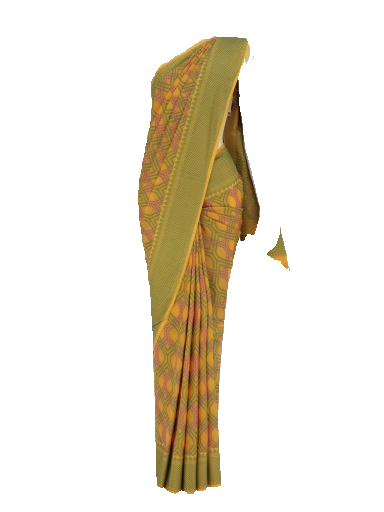

In [16]:
show_masks(segments, image, all_labels)	